# Exercice 1

Dans cet exercice on va appliquer un filtre convolutionnel puis un seuil à l'image Fry.bmp et étudier le résultat.

Pour tout pixel i de l'image :

- e<sub>i</sub> = 1 si : &sum;<sub>j voisin du pixel</sub> a<sub>ij</sub> * e<sub>j</sub> > seuil
- e<sub>i</sub> = 0 sinon



On réalise les différentes imports nécessaires :

In [28]:
from skimage import io
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

On définit la fonction qui permet d'appliquer le filtre à l'image.

In [29]:
def apply_kernel(image: np.ndarray, kernel: np.ndarray, threshold: np.float32) -> np.ndarray:
    if len(image.shape) != 2:
        raise ValueError('Image must be 2D')
    if len(kernel.shape) != 2:
        raise ValueError('Kernel must be 2D')
    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError('Kernel must have odd dimensions')
    if image.dtype not in (np.uint8, np.uint16, np.uint32, np.uint64):
        raise ValueError('Image must have unsigned integer type')
    if kernel.dtype not in (np.float32, np.float64):
        raise ValueError('Kernel must have floating point type')
    convolved = ndimage.convolve(image, kernel, mode='constant', cval=0.0)
    binary = np.where(convolved > threshold, 1, 0)
    return binary

On applique le filtre à l'image pour un filtre a<sub>voisin</sub> = 1 et on fait varier le seuil.

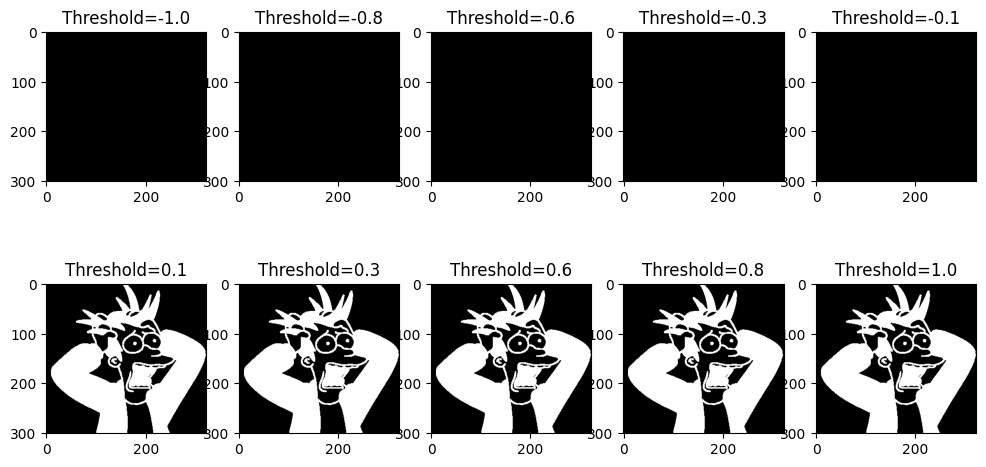

In [30]:
# Load the image
image: np.ndarray = io.imread('data/Fry.bmp')

# Define the filter matrix and threshold
kernel: np.ndarray = np.ones((3, 3))
thresholds: np.ndarray = np.linspace(-1, 1, 10, dtype=np.float32)

# Create a 2x5 grid of subplots
rows: int = 2
cols: int = 5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))

# Apply the filters and show the filtered images in the other subplots
for i, threshold in enumerate(thresholds):
    ouput: np.ndarray = apply_kernel(image=image, kernel=kernel, threshold=threshold)
    row: int = i // cols
    col: int = i % cols
    axes[row, col].imshow(ouput, cmap='gray')
    axes[row, col].set_title(f'Threshold={threshold:.1f}')

plt.show()

On observe que l'image reste inchangé peu importe le seuil.

On applique maintenant le noyau de convolution suivant : 

$$
\begin{bmatrix}
\alpha & -1 & -1 \\
-1 & \alpha & -1 \\
-1 & -1 & \alpha
\end{bmatrix}
$$

On fait varier $\alpha$ et le seuil.

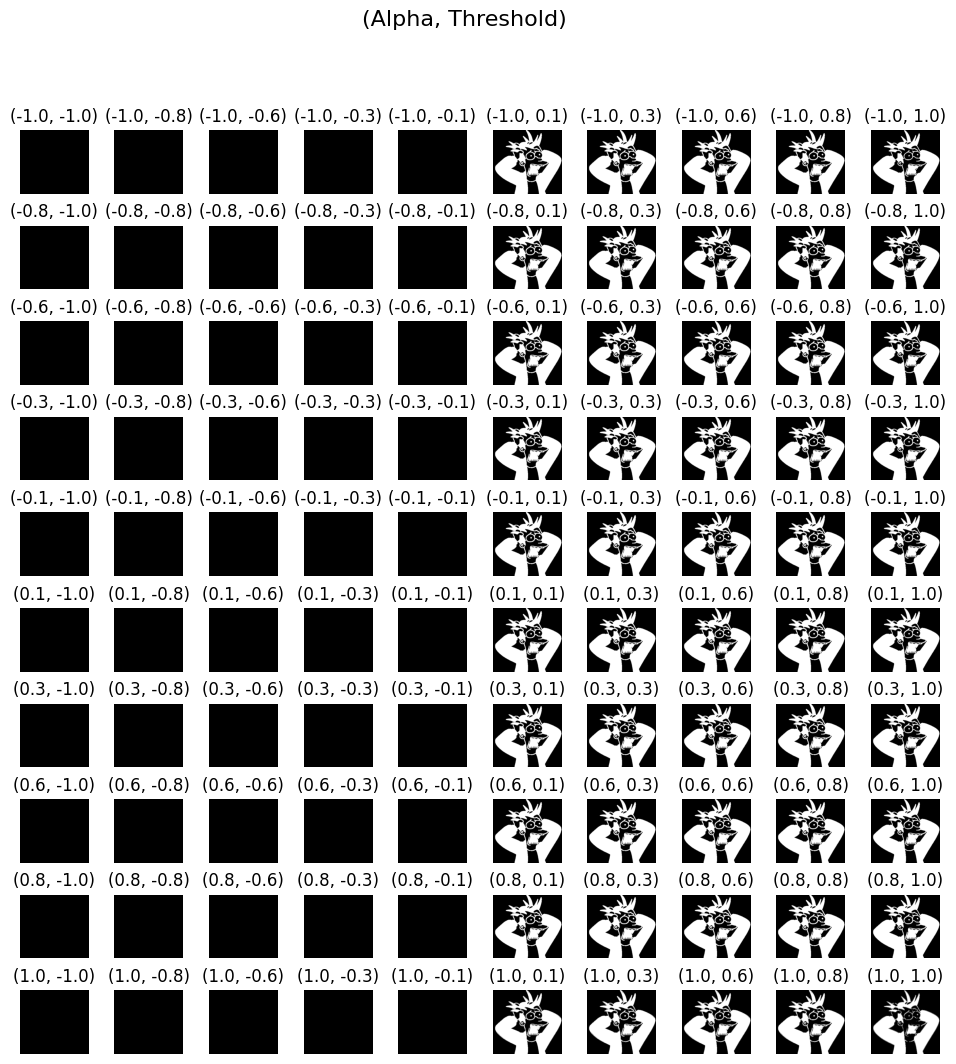

In [31]:
def kernelAlpha(alpha: np.float32) -> np.ndarray:
    return np.ones((3, 3)) * -1 + np.eye(3, 3) * (1+alpha)

rows: int = 10
cols: int = 10

# Define the alpha and threshold
alphas: np.ndarray = np.linspace(-1, 1, rows, dtype=np.float32)
thresholds: np.ndarray = np.linspace(-1, 1, cols)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12))

# Add more vertical space between subplots
fig.subplots_adjust(hspace=0.5)

# Add title
fig.suptitle('(Alpha, Threshold)', fontsize=16)

# Apply the filters and show the filtered images in the other subplots
for i, alpha in enumerate(alphas):
    for j, threshold in enumerate(thresholds):
        kernel: np.ndarray = kernelAlpha(alpha)
        output: np.ndarray = apply_kernel(image=image, kernel=kernel, threshold=threshold)
        row: int = i
        col: int = j
        axes[row, col].imshow(output, cmap='gray')
        axes[row, col].set_title(f'({alpha:.1f}, {threshold:.1f})')
        axes[row, col].axis('off')

plt.show()